In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Afsaan/Data-Science/master/Linear%20Regression/housing/housingData-Real.csv')

In [3]:
# first 5 columns of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Target variable - price


In [4]:
# checking the details of the dataset or information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.shape

(21613, 21)

In [6]:
# converting the date column to proper dates
df['date']=pd.to_datetime(df['date'])

In [7]:
# now we can see that the date column is converted into proper date
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# dropping the unnecessary column
df=df.drop(['id','date'],axis=1)

### simple linear regression

In [9]:
# finding the best fit model with only one independent variable
#sns.jointplot(data=df,x='sqft_living',y='price',kind='reg',color='g')

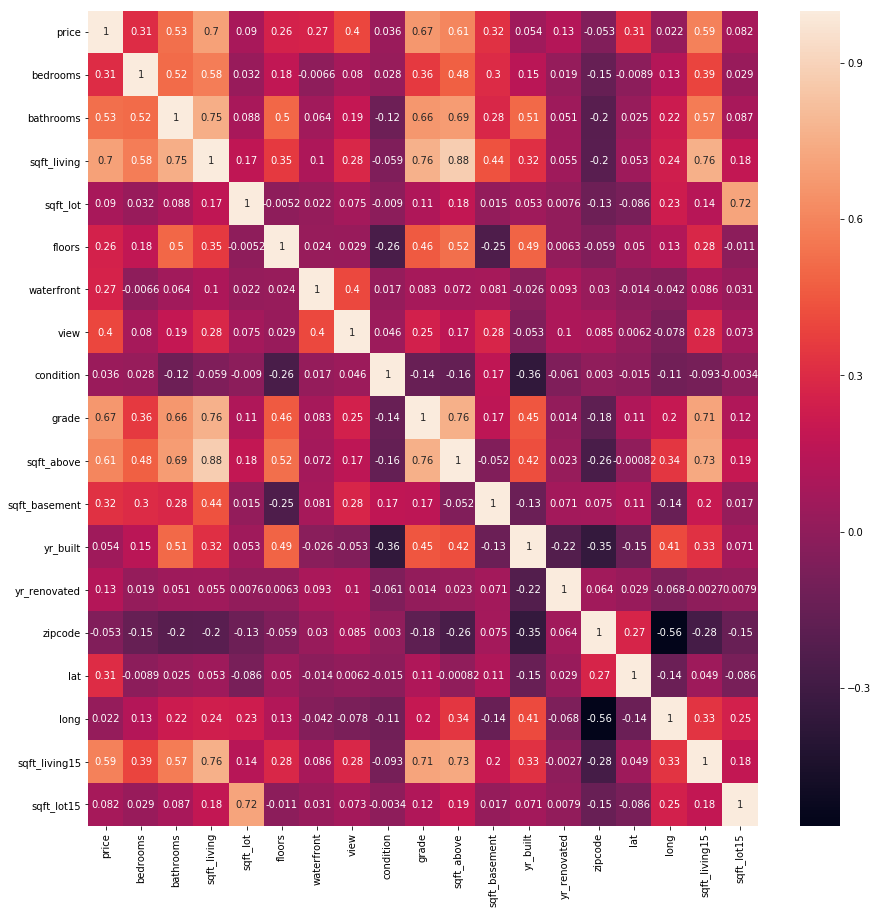

In [10]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [11]:
# As we can see that the sqft_living column is more corelated to price. so let us consider independent variable as sqft_living

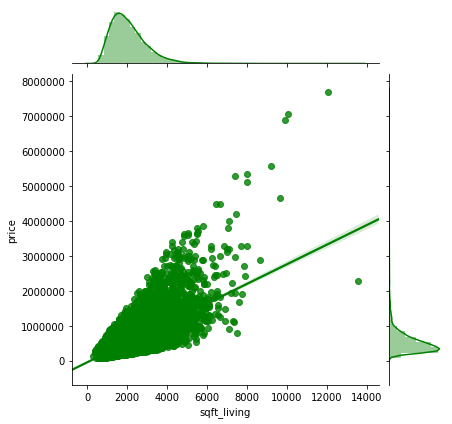

In [12]:
sns.jointplot(data=df,x='sqft_living',y='price',kind='reg',color='g')

In [13]:
x=df[['sqft_living']] # Independent variable
y=df[['price']] # Dependent variable

In [14]:
# splitting the dataset into test and train model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [15]:
reg=LinearRegression()
# train the data
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print('intercept :',reg.intercept_)

intercept : [-38096.66450533]


In [17]:
print('slope :',reg.coef_)

slope : [[278.1991546]]


In [18]:
# predicting the response of the test data
y_pred=reg.predict(x_test)

In [19]:
r2_score(y_test,y_pred)

0.5185480212648037

## Multivariate linear regression

In [20]:
X=df.drop(['price'],axis=1)
Y=df.price

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
reg1=LinearRegression()
reg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
Y_pred=reg1.predict(X_test)

In [24]:
r2_score(Y_test,Y_pred)

0.7156152938565449

In [25]:
print("r2_score of simple linear regression :",r2_score(y_test,y_pred))
print("r2_score of multivariate linear regression :",r2_score(Y_test,Y_pred))

r2_score of simple linear regression : 0.5185480212648037
r2_score of multivariate linear regression : 0.7156152938565449


As we can see that r2_score of multivariate regression is more when compared to simple linear regression